In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# Parameters
learning_rate = 0.0001
training_epochs = 45 #15
batch_size = 100
display_step = 1

C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

In [2]:
import csv
import os
import numpy as np

#인코딩중요
#라벨만들기
with open('./trainSet.csv', 'r', encoding='UTF-8-sig') as raw:
    lines = raw.readlines()
data = list(csv.reader(lines))
data = sorted(data, key=lambda x: x[0])

#이름빼기
_Y = [y[1] for y in data]

_Y = np.array(_Y)
_Y = _Y.astype(float) # shape(-1)
_Y = [[1-y, y] for y in _Y] # shape(-1, 2)


#데이터만들기
with open('./features1024.csv', 'r', encoding='UTF-8-sig') as raw:
    lines = raw.readlines()
data = list(csv.reader(lines))
data = sorted(data, key=lambda x: x[0])

#이름빼기
_X = [x[1:] for x in data]

_X = np.array(_X)
_X = _X.astype(float) # shape(-1, 1024)

#K = 0
K = np.random.randint(0,4)

#train_X = _X[:8000]
#train_Y = _Y[:8000]
#test_X = _X[8000:]
#test_Y = _Y[8000:]
train_X = np.array([_X[i] for i in range(len(_X)) if (i-K)%5 != 0])
train_Y = np.array([_Y[i] for i in range(len(_X)) if (i-K)%5 != 0])
test_X = np.array([_X[i] for i in range(len(_X)) if (i-K)%5 == 0])
test_Y = np.array([_Y[i] for i in range(len(_X)) if (i-K)%5 == 0])

train_set = tuple(zip(train_X, train_Y))
test_set = tuple(zip(test_X, test_Y))

M_test_X = [t[0] for t in test_set if t[1][1] == 1] # label의 악성이면
M_test_Y = [t[1] for t in test_set if t[1][1] == 1] # label의 악성이면

N_test_X = [t[0] for t in test_set if t[1][0] == 1] # label의 정상이면
N_test_Y = [t[1] for t in test_set if t[1][0] == 1] # label의 정상이면



In [3]:
with tf.device('/gpu:0'):
    X = tf.placeholder(tf.float32, [None, 1024])
    Y = tf.placeholder(tf.float32, [None, 2])
    keep_prob = tf.placeholder(tf.float32)

    #X = tf.nn.dropout(X, keep_prob=keep_prob)

    # Layer1
    W1 = tf.get_variable('W1', shape=[1024,500], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([500]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

    # Layer2
    W2 = tf.get_variable('W2', shape=[500,250], initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([250]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
    L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

    # Layer3
    W3 = tf.get_variable('W3', shape=[250,100], initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([100]))
    L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
    L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

    # Layer4
    W4 = tf.get_variable('W4', shape=[100,50], initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([50]))
    L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
    L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
    
    # Layer5
    W5 = tf.get_variable('W5', shape=[50,25], initializer=tf.contrib.layers.xavier_initializer())
    b5 = tf.Variable(tf.random_normal([25]))
    L5 = tf.nn.relu(tf.matmul(L4, W5) + b5)
    L5 = tf.nn.dropout(L5, keep_prob=keep_prob)

    # Layer6
    W6 = tf.get_variable('W6', shape=[25,2], initializer=tf.contrib.layers.xavier_initializer())
    b6 = tf.Variable(tf.random_normal([2]))
    hypothesis = tf.matmul(L5, W6) + b6


    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [4]:
# Training
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#sess.run(tf.initialize_all_variables())

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(len(train_X) / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = train_X[i*100:(i+1)*100], train_Y[i*100:(i+1)*100]
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        #feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        
        avg_cost += c / total_batch #뭉치갯수로 나누기
        
        
    print('Epoch : ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))


Epoch :  0001 cost =  0.802156405
Epoch :  0002 cost =  0.681238996
Epoch :  0003 cost =  0.637991361
Epoch :  0004 cost =  0.611658181
Epoch :  0005 cost =  0.598092906
Epoch :  0006 cost =  0.564164800
Epoch :  0007 cost =  0.547342619
Epoch :  0008 cost =  0.528188508
Epoch :  0009 cost =  0.503602214
Epoch :  0010 cost =  0.475217192
Epoch :  0011 cost =  0.456983923
Epoch :  0012 cost =  0.442219688
Epoch :  0013 cost =  0.429449419
Epoch :  0014 cost =  0.417274714
Epoch :  0015 cost =  0.404700445
Epoch :  0016 cost =  0.394823047
Epoch :  0017 cost =  0.381232494
Epoch :  0018 cost =  0.377730439
Epoch :  0019 cost =  0.361615859
Epoch :  0020 cost =  0.354643864
Epoch :  0021 cost =  0.355454532
Epoch :  0022 cost =  0.344002358
Epoch :  0023 cost =  0.340521573
Epoch :  0024 cost =  0.323497100
Epoch :  0025 cost =  0.325219602
Epoch :  0026 cost =  0.324117569
Epoch :  0027 cost =  0.311690323
Epoch :  0028 cost =  0.309831062
Epoch :  0029 cost =  0.298753432
Epoch :  0030 

Instructions for updating:
Use `tf.math.argmax` instead
Accuracy :  0.9045
정탐율 :  0.9743224
오탐율 :  0.25919729471206665
Label: [1]
Prediction: [1]


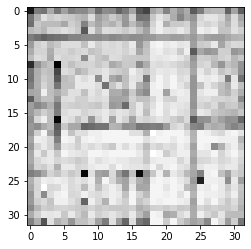

In [5]:
# TEST
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

feed_dict = {X: test_X, Y: test_Y, keep_prob: 1}
print("Accuracy : ", accuracy.eval(session=sess, feed_dict=feed_dict))

feed_dict = {X: M_test_X, Y: M_test_Y, keep_prob: 1}
print("정탐율 : ", accuracy.eval(session=sess, feed_dict=feed_dict))

feed_dict = {X: N_test_X, Y: N_test_Y, keep_prob: 1}
print("오탐율 : ", 1 - accuracy.eval(session=sess, feed_dict=feed_dict))




r = random.randint(0, len(test_X) - 1)
print('Label:', sess.run(tf.argmax(test_Y[r:r+1], 1)))

feed_dict = {X: test_X[r:r+1], keep_prob: 1}
print('Prediction:', sess.run(tf.argmax(hypothesis, 1), feed_dict=feed_dict))

plt.imshow(test_X[r:r+1].reshape(32, 32), cmap='Greys', interpolation='nearest')
plt.show()